In [36]:
from glob import glob
import matplotlib.image as mpimg
from PIL import Image

In [31]:
#All of the photos taken

images = glob('/Users/ewa_anna_szyszka/Desktop/LBA_ML/*')

<bound method Figure.show of <matplotlib.figure.Figure object at 0x1a27155410>>

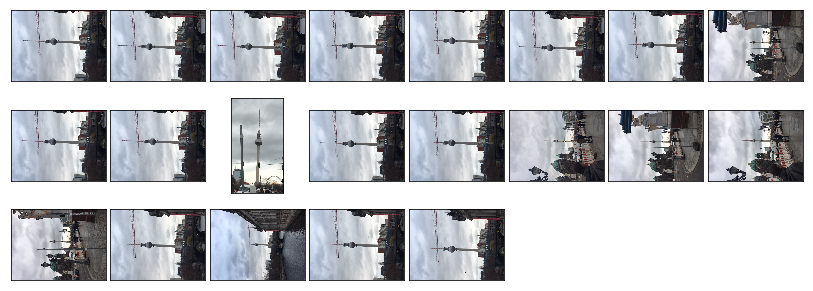

In [34]:
#Showing the images pre-PCA

fig = plt.figure(figsize=(11,11)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(21):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(mpimg.imread(images[i]), cmap=plt.cm.bone, interpolation='nearest')
    
fig.show

In [40]:
#Flattening the array - checking the dimensions

with open('/Users/ewa_anna_szyszka/Desktop/LBA_ML/IMG_5861-1.JPG', 'r+b') as f:
    with Image.open(f) as image:
        resized = image.resize((100, 100))
        a = np.array(resized)
        print a.shape
        z = np.array(resized).flatten()
        print z.shape

(100, 100, 3)
(30000,)


In [46]:
#Flattening the data and resizing the data - function
im = []

def flatten_image_array(image_file):
    with open(image_file, 'r+b') as f:
        with Image.open(f) as image:
            resized = image.resize((100, 100)) #resizing of the image
            return np.array(resized).flatten()
    
#Flattening all images 
for url in images:
    im.append(flatten_image_array(url))
    
im[0]

array([213, 230, 250, ...,  20,  18,  21], dtype=uint8)

In [47]:
im = np.array(im)
im.shape

(21, 30000)

In [48]:
#Compressing the images into two dimensions using PCA

pca = PCA(2) 
X_proj = pca.fit_transform(im) #What is the difference between fit and fit_transform?
print X_proj

[[-4018.49559397  1289.57451844]
 [-2673.22672659 -2580.98050814]
 [-2293.16474414 -2690.29096298]
 [-3662.54689909 -1648.17743156]
 [-3888.51957191  1674.83657199]
 [-2982.69303227 -1970.03209815]
 [-4070.05550282  -648.25521258]
 [ 9364.57087703 -1003.96955644]
 [-3781.35788445   848.53346172]
 [-4018.49559397  1289.57451844]
 [ 1705.75770632 13378.00434369]
 [-4001.83152264  -328.59598126]
 [-4158.25349273   603.80692234]
 [ 6252.9915247    347.59147024]
 [ 9243.79602607  -831.68609543]
 [ 7006.87838513   305.58601602]
 [ 8420.85314975 -1567.18575432]
 [-2721.15676196 -2393.35804088]
 [ 6729.0512189  -2278.54622764]
 [-4024.97480814  -795.779215  ]
 [-2429.12675323 -1000.65073853]]


In [49]:
def image_from_component_values(component):
    hi = max(component)
    lo = min(component)
    n = int(len(component) / 3)
    divisor = hi - lo
    if divisor == 0:
        divisor = 1
    
    def rescale(x):
        return int(255 * (x - lo) / divisor)
    
    d = [(rescale(component[3 * i]),
          rescale(component[3 * i + 1]),
          rescale(component[3 * i + 2])) for i in range(n)]
    im = Image.new('RGB',(100,100))
    im.putdata(d)
    return im

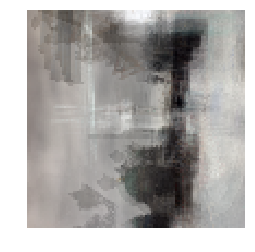

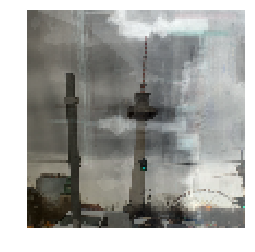

In [50]:
fig=plt.figure()
plt.imshow(image_from_component_values(pca.components_[0]))
plt.axis('off')
plt.show()
plt.imshow(image_from_component_values(pca.components_[1]))
plt.axis('off')
plt.show()

/Users/ewa_anna_szyszka/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


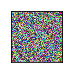

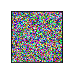

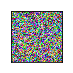

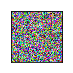

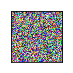

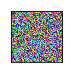

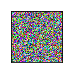

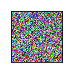

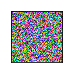

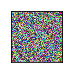

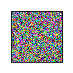

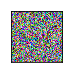

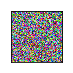

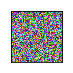

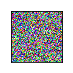

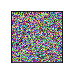

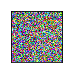

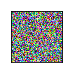

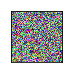

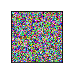

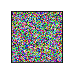

In [51]:
#Reconstructing the images back from the PCA
X_inv_proj = pca.inverse_transform(X_proj)

X_proj_img = np.reshape(X_inv_proj,(21,1,30000))  #reshaping back to the im array size


#Plotting the image reconstructions
for i in range(21):
    a = X_proj_img[i].reshape(100,100,3)

    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(a, cmap=plt.cm.bone, interpolation='nearest') 